#  EDA Case Study 
### This case study aims to identify patterns to understand the driving factors behind loan default


#### First, let's import all the dependancies

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
print('Packages imported successfully')

Packages imported successfully


#### Now, let's import the Application Dataset

In [135]:
data_app = pd.read_csv('Data\\application_data.csv')

In [136]:
# lets observe the shape of the dataframe
data_app_rows, data_app_cols = data_app.shape
print('Shape of Applications Data: Rows',data_app_rows,'Columns:',data_app_cols)

Shape of Applications Data: Rows 307511 Columns: 122


## Handling Missing Values (NaN)

#### Let's find columns with missing values

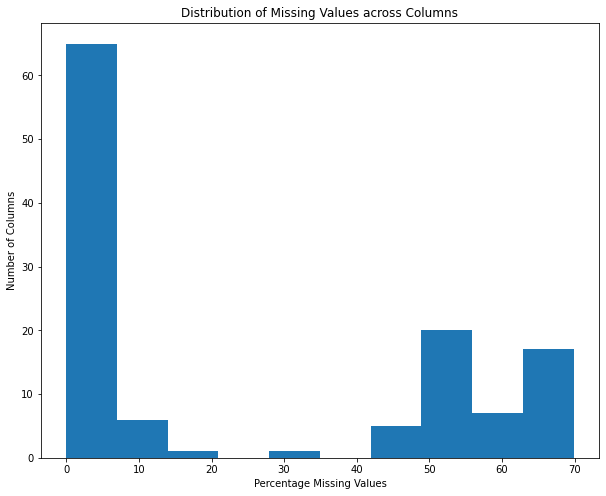

In [137]:
app_data_mis_vals = round(data_app.isnull().sum()/data_app_rows*100,2)

plt.figure(figsize=[10,8])
app_data_mis_vals.plot.hist().set(xlabel='Percentage Missing Values',ylabel='Number of Columns',title='Distribution of Missing Values across Columns')
plt.show()

##### From the above graph it is evident that there are many columns with the missing values percentage more than 40%, since 40% is a significant number for missing values in the dataset, we can drop these columns.

#### Dropping the Columns with missing values

In [138]:
#List of columns with missing values percentage greater than 40
drop_cols = app_data_mis_vals[app_data_mis_vals>40].index.tolist()

print('Number of Columns that have missing values percentage greater than 40%:', len(drop_cols))

Number of Columns that have missing values percentage greater than 40%: 49


In [139]:
#Dropping above columns
data_app.drop(labels=drop_cols,axis=1,inplace=True)

#Verifying the shape of the dataframe 
print('New Shape of Dataframe: ',data_app.shape)

New Shape of Dataframe:  (307511, 73)


### Let's see the infomation about the dataset now

In [140]:
#Lets get information obout the dataframe now
data_app.info(verbose=True,null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   NAME_CONTRACT_TYPE           object 
 3   CODE_GENDER                  object 
 4   FLAG_OWN_CAR                 object 
 5   FLAG_OWN_REALTY              object 
 6   CNT_CHILDREN                 int64  
 7   AMT_INCOME_TOTAL             float64
 8   AMT_CREDIT                   float64
 9   AMT_ANNUITY                  float64
 10  AMT_GOODS_PRICE              float64
 11  NAME_TYPE_SUITE              object 
 12  NAME_INCOME_TYPE             object 
 13  NAME_EDUCATION_TYPE          object 
 14  NAME_FAMILY_STATUS           object 
 15  NAME_HOUSING_TYPE            object 
 16  REGION_POPULATION_RELATIVE   float64
 17  DAYS_BIRTH                   int64  
 18  DAYS_EMPLOYED                int64  
 19  DA

<ipython-input-140-e5d740f19301>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_app.info(verbose=True,null_counts=False)


In [141]:
impute_cols = data_app.isnull().sum()/data_app_rows*100
impute_cols_list = impute_cols[impute_cols>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### Let's observe the rows in the dataset having missing values

In [142]:
null_data = data_app[data_app.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Imputation

In [143]:
# Creating a function to fill missing values appropriately
def fill_null(col_name,df,how):
    df[col_name].fillna(how,inplace=True)
    print('Missing Values have been Immputed for',col_name)

In [144]:
#Let's take OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns 
data_app[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

OCCUPATION_TYPE    96391
EXT_SOURCE_2         660
EXT_SOURCE_3       60965
dtype: int64

In [145]:
data_app['EXT_SOURCE_3'].value_counts(normalize=True)

0.746300    0.005922
0.713631    0.005334
0.694093    0.005176
0.670652    0.004831
0.652897    0.004681
              ...   
0.013948    0.000004
0.014148    0.000004
0.017506    0.000004
0.020455    0.000004
0.028275    0.000004
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [146]:
data_app['EXT_SOURCE_2'].value_counts(normalize=True)

0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.157007    0.000003
0.721955    0.000003
0.032513    0.000003
0.204329    0.000003
0.064909    0.000003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [147]:
data_app['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [148]:
#Lets look at CNT_FAM_MEMBERS column, number of missing values
data_app['CNT_FAM_MEMBERS'].isnull().sum()

2

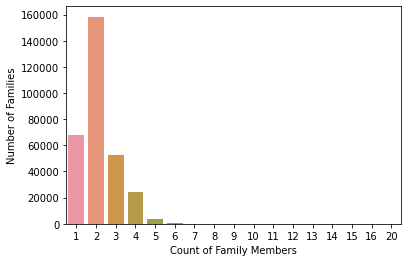

In [149]:
#Lets look at CNT_FAM_MEMBERS column, 
df = data_app['CNT_FAM_MEMBERS'].value_counts().to_frame(name='Number of Families')
df['Count of Family Members']= df.index.astype('Int64')
df.reset_index(drop=True, inplace=True)
sns.barplot(data=df, x='Count of Family Members', y='Number of Families')
plt.show()

##### It can be seen most of the families 2 family members, hence it is safe to impute missing values with Mode of CNT_FAM_MEMBERS column

In [150]:
#EXT_SOURCE_3,EXT_SOURCE_2 are normalized scores from data source 3 and 2, we can impute missing values with average value
fill_null('EXT_SOURCE_3',data_app,data_app.EXT_SOURCE_3.mean)
fill_null('EXT_SOURCE_2',data_app,data_app.EXT_SOURCE_2.mean)
#OCCUPATION_TYPE column has unordered categorical values, we can impute missing values with a value 'Unavailable'
fill_null('OCCUPATION_TYPE',data_app,'Unavailable')
#CNT_FAM_MEMBERS can be imputed with the mode
fill_null('CNT_FAM_MEMBERS',data_app,data_app.CNT_FAM_MEMBERS.mode)

Missing Values have been Immputed for EXT_SOURCE_3
Missing Values have been Immputed for EXT_SOURCE_2
Missing Values have been Immputed for OCCUPATION_TYPE
Missing Values have been Immputed for CNT_FAM_MEMBERS


In [151]:
#Let's verify Null Values for OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns 
data_app[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

OCCUPATION_TYPE    0
EXT_SOURCE_2       0
EXT_SOURCE_3       0
dtype: int64

In [152]:
#Function to plot subplot for the AMT_* columns
def bar_plot(col_list):
    plt.figure(figsize=[18,10])
    i=1
    for col in col_list:
        plt.subplot(2,3,i) 
        tmp = data_app[col].value_counts(normalize=True)*100
        tmp.plot.bar().set(xlabel= 'No of '+str(col.split('_')[-1]), ylabel='Percent count of records',title= 'No of '+str(col.split('_')[-1])+' vs Percent Count of records')

        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()

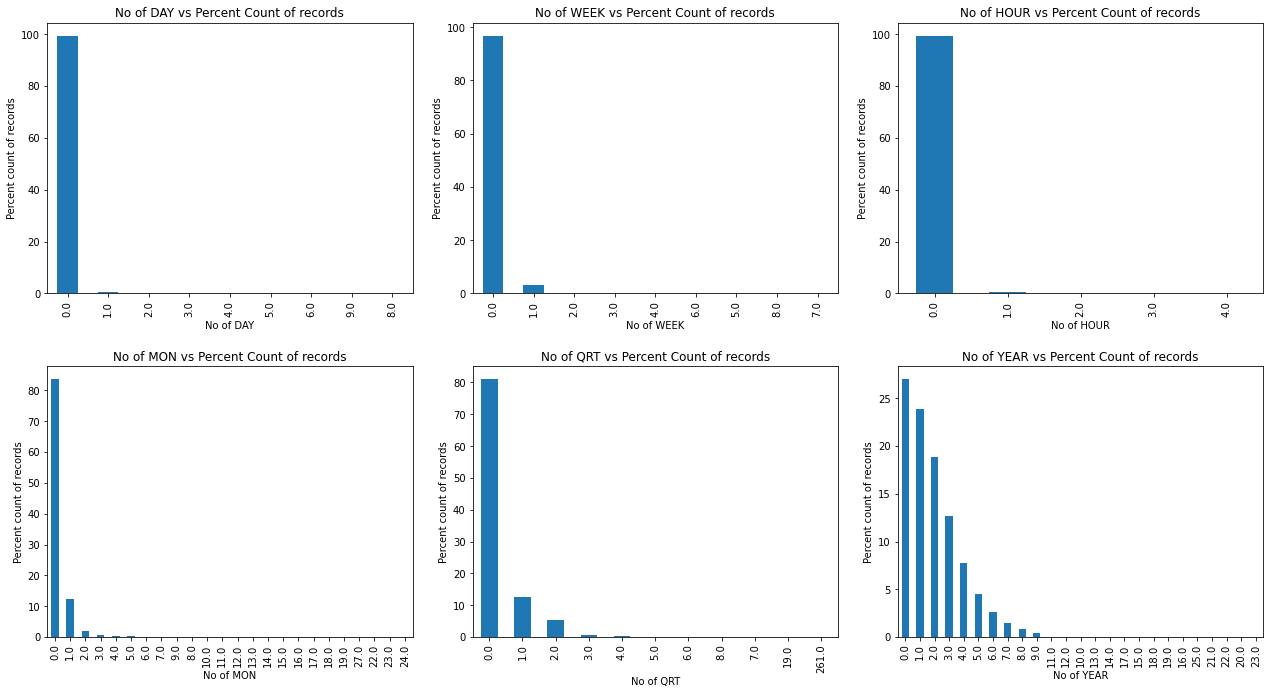

In [153]:
list_Cols = ['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
bar_plot(list_Cols)

##### As 99% of the values in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, 

##### AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_QRT columns are 0, hence it is safe to impute missing values with 0

##### For AMT_REQ_CREDIT_BUREAU_YEAR column we can impute missing values with the median number of years

In [154]:
data_app.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':0,
 'AMT_REQ_CREDIT_BUREAU_DAY':0,
 'AMT_REQ_CREDIT_BUREAU_WEEK':0,
 'AMT_REQ_CREDIT_BUREAU_MON':0,
 'AMT_REQ_CREDIT_BUREAU_QRT':0,
 'AMT_REQ_CREDIT_BUREAU_YEAR':data_app.AMT_REQ_CREDIT_BUREAU_YEAR.median()},inplace=True,)

#### AMT_ANNUITY and AMT_GOODS_PRICE columns

In [155]:
data_app['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

## Handling Invalid Data

#### First lets see columns with Object data types


In [156]:
data_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Let's find out the columns with Object data type 

In [157]:
obj_cols = data_app.select_dtypes(np.object).columns.tolist()
obj_cols

<ipython-input-157-c8d323af7365>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_cols = data_app.select_dtypes(np.object).columns.tolist()


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [158]:
data_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

###### No issues with this column

In [159]:
data_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### There are 4 records that do not belong to Male or Female customers, hence we can drop the records respective to these values

In [160]:
#Dropping records with XNA values
drop_genders = data_app[data_app.CODE_GENDER =="XNA"].index
data_app.drop(drop_genders, inplace=True)

In [161]:
data_app.FLAG_OWN_CAR.value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

##### No issues with FLAG_OWN_CAR column

In [162]:
data_app.FLAG_OWN_REALTY.value_counts()
#No issues with this column

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [163]:
data_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### No issues with NAME_TYPE_SUITE column

In [164]:
data_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##### No issues with ORGANIZATION_TYPE column

###### There are 55374 records where there is no information about the Organisation Type, we can keep it as-is.

In [165]:
data_app.NAME_HOUSING_TYPE.value_counts()

House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

##### No issues with NAME_HOUSING_TYPE column

### Now lets look at invalid data in numeric columns 

In [166]:
int_cols = data_app.select_dtypes(np.int64).columns.tolist()
data_app[int_cols]

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,-9327,-236,-1982,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,-20775,365243,-4090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


##### Since there are Days_* columns with the duration data till the loan application was made, as we do not have age data of the customer we can calculate the same from DAYS_BIRTH

In [167]:
#Let's create a new feature Age (in Years)
data_app['Age_Years'] = data_app.DAYS_BIRTH.apply(lambda x: int(np.floor(abs(x)/365)))

In [168]:
float_cols = data_app.select_dtypes(np.float64).columns.tolist()
data_app[float_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


##### There are two columns DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE which should have been of type int64, so lets change their data type

In [169]:
data_app.DAYS_REGISTRATION = data_app.DAYS_REGISTRATION.astype('int64')
data_app.DAYS_LAST_PHONE_CHANGE = data_app.DAYS_LAST_PHONE_CHANGE.notna().astype('int64')

In [170]:
data_app.DAYS_REGISTRATION

0        -3648
1        -1186
2        -4260
3        -9833
4        -4311
          ... 
307506   -8456
307507   -4388
307508   -6737
307509   -2562
307510   -5128
Name: DAYS_REGISTRATION, Length: 307507, dtype: int64

## Finding Outliers in the Dataset

#### Let's take numeric columns first

In [171]:
num_cols = data_app.select_dtypes([np.int64,np.float64]).columns.tolist()
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLA

#### let's find outliers by plotting Boxplot

In [185]:
#Function to plot subplot for the AMT_* columns
def box_plot(df,col_list):
    plt.figure(figsize=[16,12])
    i=1
    for col in col_list:
        plt.subplot(2,3,i)
        sns.boxplot(data=df[col]).set(title='Box plot for '+col.replace('_',' '))
        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()

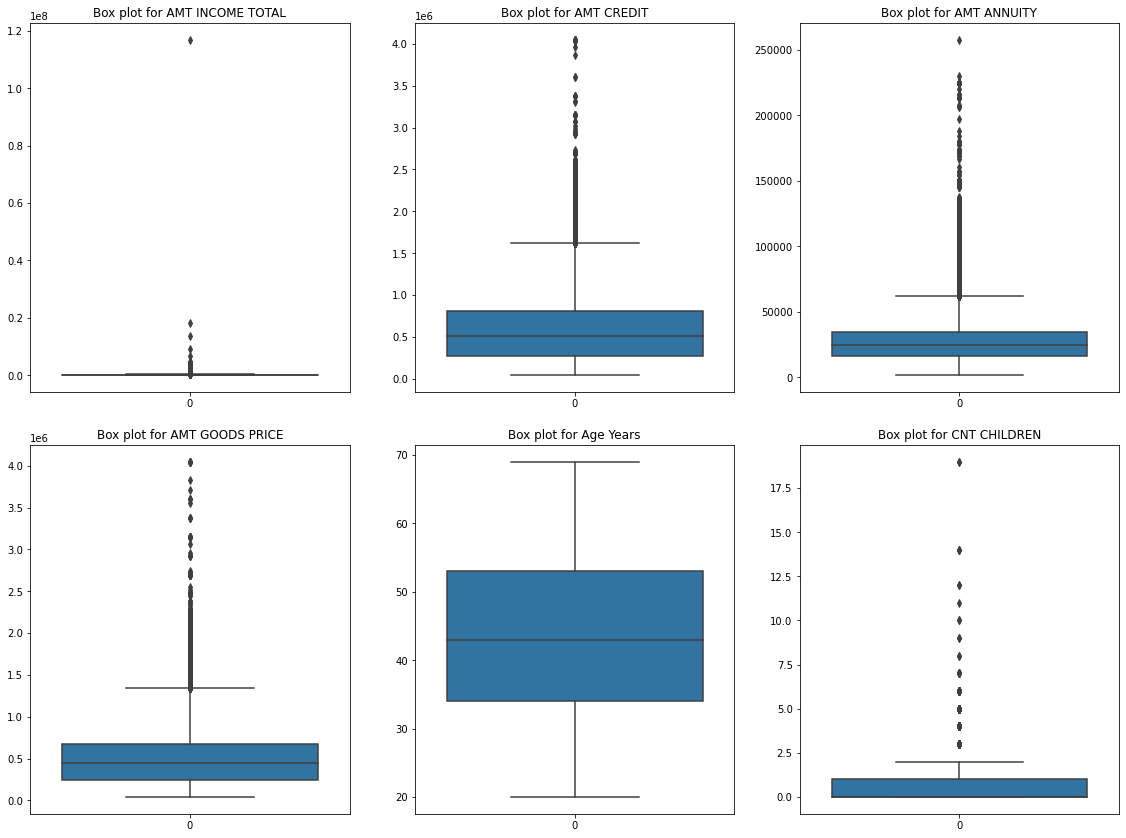

In [186]:
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age_Years', 'CNT_CHILDREN']
box_plot(data_app,col_list)

### Lets remove the outliers

In [174]:
INCOME_90 = data_app.AMT_INCOME_TOTAL.quantile(q=0.9)

In [175]:
data_app.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [176]:
CREDIT_95 = data_app.AMT_CREDIT.quantile(q=0.95)

In [177]:
data_app.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [178]:
ANNUITY_97 = data_app.AMT_ANNUITY.quantile(q=0.97)

In [179]:
data_app.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [180]:
GOODS_PRICE_97 = data_app.AMT_GOODS_PRICE.quantile(q=0.97)

In [181]:
data_app.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [182]:
CNT_CHILDREN_999 = data_app.CNT_CHILDREN.quantile(q=0.999)

#### Removing the outliers

In [183]:
app_data_final=data_app.copy()
app_data_final=app_data_final[app_data_final['AMT_INCOME_TOTAL'] <=INCOME_90]
app_data_final=app_data_final[app_data_final['AMT_ANNUITY'] <=ANNUITY_97]
app_data_final=app_data_final[app_data_final['AMT_GOODS_PRICE'] <=GOODS_PRICE_97]
app_data_final=app_data_final[app_data_final['CNT_CHILDREN'] <=CNT_CHILDREN_999]
app_data_final=app_data_final[app_data_final['AMT_CREDIT'] <=CREDIT_95]

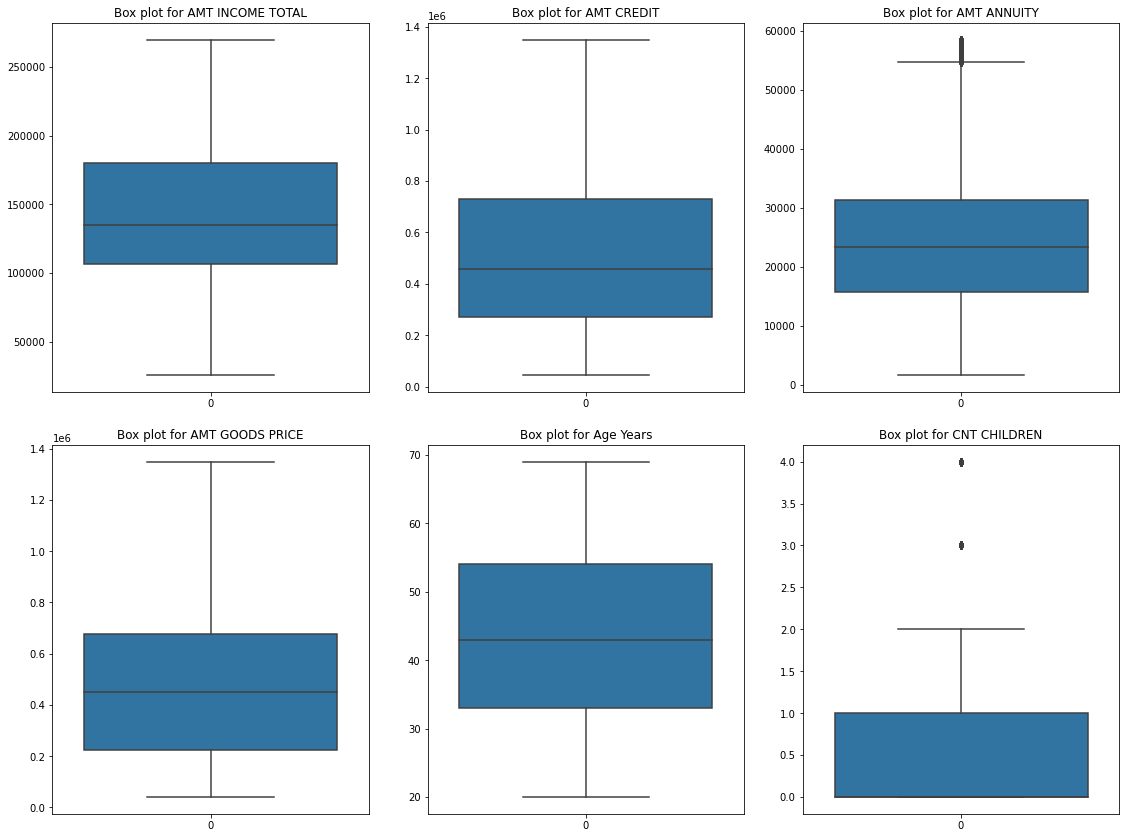

In [190]:
#let's verify the columns after removing the outliers
box_plot(app_data_final,col_list)

##### From the above graphs we can see that the most of the outliers have been removed

### Lets see if there are any contious numerical columns

In [191]:
app_data_final.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,39
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,27
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,55


##### There are AMT_* columns and Age_Years which has continous numerical values, we can perform binning on these columns

In [192]:
app_data_final.Age_Years.describe()

count    267610.000000
mean         43.457326
std          12.163040
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age_Years, dtype: float64

In [193]:
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80']
cut_bins = [0, 10,20,30,40,50,60,70,80]
app_data_final['Age_Groups'] = pd.cut(app_data_final['Age_Years'], bins=cut_bins, labels=cut_labels)

In [194]:
app_data_final['Age_Groups']

0         21-30
1         41-50
2         51-60
3         51-60
4         51-60
          ...  
307506    21-30
307507    51-60
307508    41-50
307509    31-40
307510    41-50
Name: Age_Groups, Length: 267610, dtype: category
Categories (8, object): ['0-10' < '11-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80']

#### Now lets bin the AMT_INCOME_TOTAL column

In [195]:
app_data_final.AMT_INCOME_TOTAL.describe()

count    267610.000000
mean     144650.112098
std       54791.690530
min       25650.000000
25%      106200.000000
50%      135000.000000
75%      180000.000000
max      270000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [196]:
cut_lbl = ['0-50000', '50001-100000', '100001-150000', '150001-200000','200001-250000','250001-300000']
cut_bns = [0, 50000, 100000, 150000, 200000, 250000, 300000]
app_data_final['INCOME_GROUP'] = pd.cut(app_data_final['AMT_INCOME_TOTAL'], bins=cut_bns, labels=cut_lbl)

In [197]:
app_data_final['INCOME_GROUP']

0         200001-250000
1         250001-300000
2          50001-100000
3         100001-150000
4         100001-150000
              ...      
307506    150001-200000
307507     50001-100000
307508    150001-200000
307509    150001-200000
307510    150001-200000
Name: INCOME_GROUP, Length: 267610, dtype: category
Categories (6, object): ['0-50000' < '50001-100000' < '100001-150000' < '150001-200000' < '200001-250000' < '250001-300000']

### Lets see how is the distribution of the data in the columns, we can see if the data is skewed or balanced, We will be analysing the Gender, Income and Age

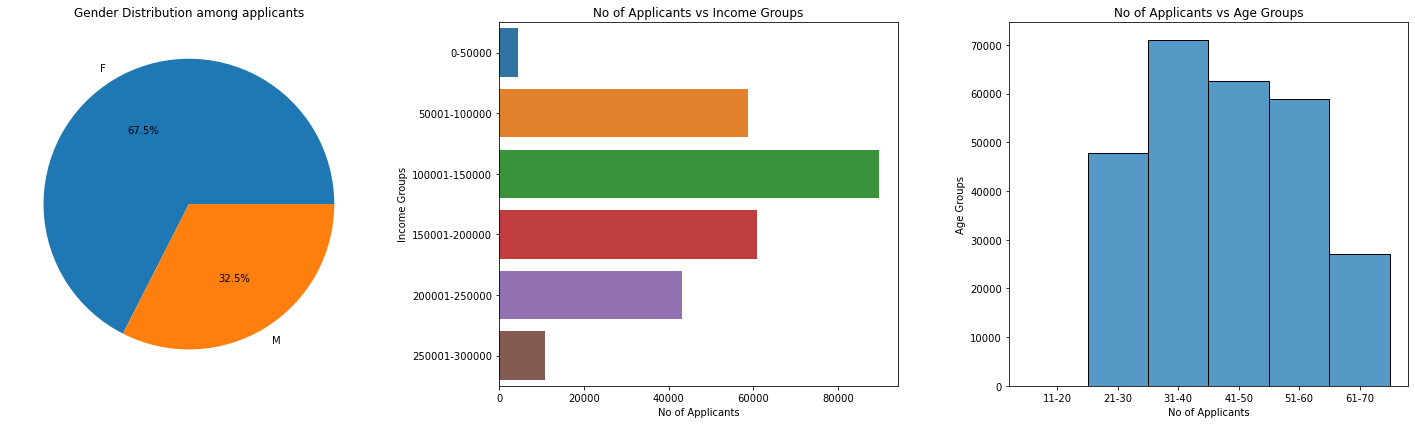

In [198]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)

GENDER = app_data_final.CODE_GENDER.value_counts(normalize=True).rename_axis('Gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.Gender, autopct='%1.1f%%')
plt.title('Gender Distribution among applicants')

plt.subplot(1,3,2)
INCOME = app_data_final.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups')

plt.subplot(1,3,3)
AGE = app_data_final.Age_Groups
sns.histplot(AGE).set(xlabel='No of Applicants', ylabel='Age Groups', title='No of Applicants vs Age Groups')


plt.tight_layout()
plt.show()

## Segmentation

###### Let's divide the dataframe in two defaulter and non-defaulters

In [199]:
target_1 = app_data_final[app_data_final['TARGET']==1].iloc[:,1:]   #Defaullter
target_0 = app_data_final[app_data_final['TARGET']==0].iloc[:,1:]   #NOn-Defaulter

In [200]:
target_1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Age_Groups,INCOME_GROUP
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,21-30,200001-250000
26,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,51,51-60,100001-150000
40,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0.0,0.0,0.0,2.0,0.0,4.0,47,41-50,200001-250000
42,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,36,31-40,100001-150000
81,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,67,61-70,50001-100000


In [201]:
target_0.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Age_Groups,INCOME_GROUP
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,41-50,250001-300000
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52,51-60,50001-100000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,52,51-60,100001-150000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,54,51-60,100001-150000
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,46,41-50,50001-100000


### Categorical Ordered Variable

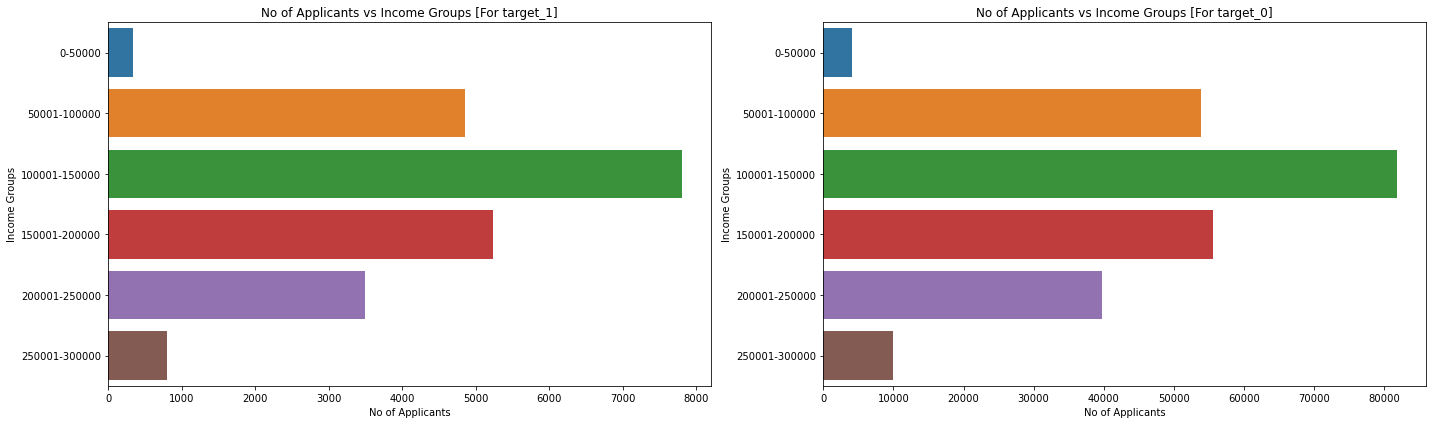

In [202]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
INCOME = target_1.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_1]')

plt.subplot(1,2,2)
INCOME = target_0.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_0]')


plt.tight_layout()
plt.show()

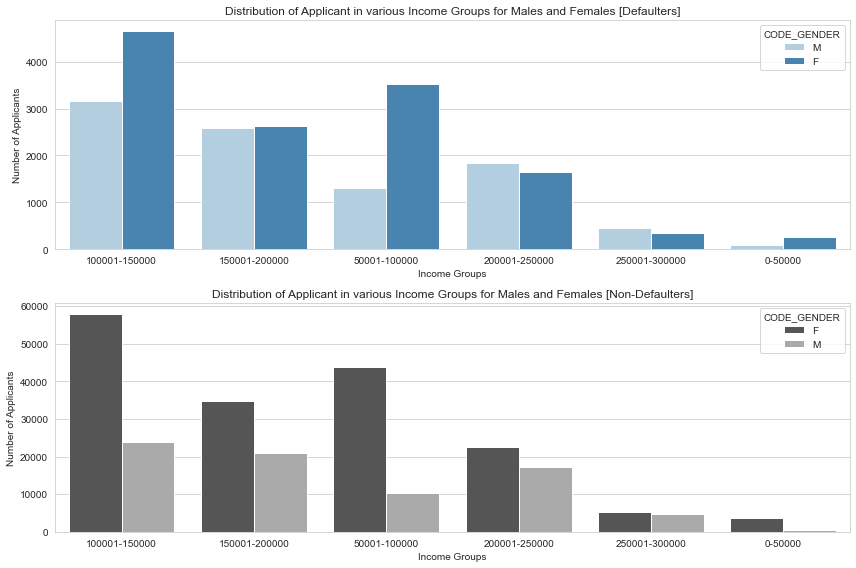

In [243]:
plt.figure(figsize=[12,8])
plt.yscale('log')
plt.subplot(211)
sns.countplot(data = target_1, x='INCOME_GROUP' , order=target_1['INCOME_GROUP'].value_counts().index,hue = target_1['CODE_GENDER'],palette='Blues').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Defaulters]')
plt.subplot(212)
sns.countplot(data = target_0, x='INCOME_GROUP' , order=target_0['INCOME_GROUP'].value_counts().index,hue = target_0['CODE_GENDER'],palette='gray').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Non-Defaulters]')
plt.tight_layout()
plt.show()

##### Number of loan applications from females are greater in all ther income groups compared to males

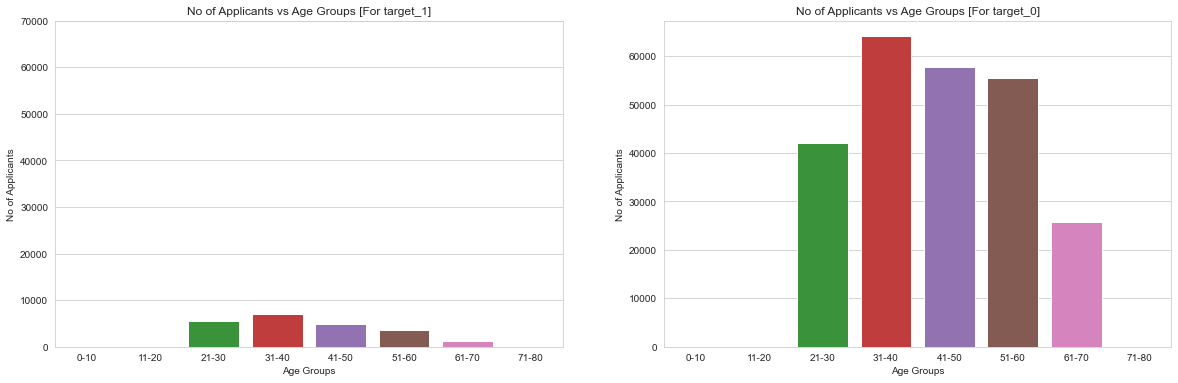

In [244]:
plt.figure(figsize=[20,6])
plt.ylim((0,70000))
plt.subplot(1,2,1)
AGE = target_1.Age_Groups.value_counts().rename_axis('AGE_Grps').reset_index(name='No. of Applicants')
sns.barplot(y=AGE['No. of Applicants'], x=AGE.AGE_Grps).set(ylabel='No of Applicants', xlabel='Age Groups', title='No of Applicants vs Age Groups [For target_1]')
plt.ylim((0,70000))
plt.subplot(1,2,2)
AGE = target_0.Age_Groups.value_counts().rename_axis('AGE_Grps').reset_index(name='No. of Applicants')
sns.barplot(y=AGE['No. of Applicants'], x=AGE.AGE_Grps).set(ylabel='No of Applicants', xlabel='Age Groups', title='No of Applicants vs Age Groups [For target_0]')

plt.show()

##### Number of loans that were defaulted and not defaulted are highest in age group 31 to 40 years and it decreases as age increases or decreases

In [205]:
week_days = target_1.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
week_days

,Week_Days,No. of Applicants
0,TUESDAY,4077
1,WEDNESDAY,3849
2,FRIDAY,3729
3,THURSDAY,3675
4,MONDAY,3543
5,SATURDAY,2453
6,SUNDAY,1180


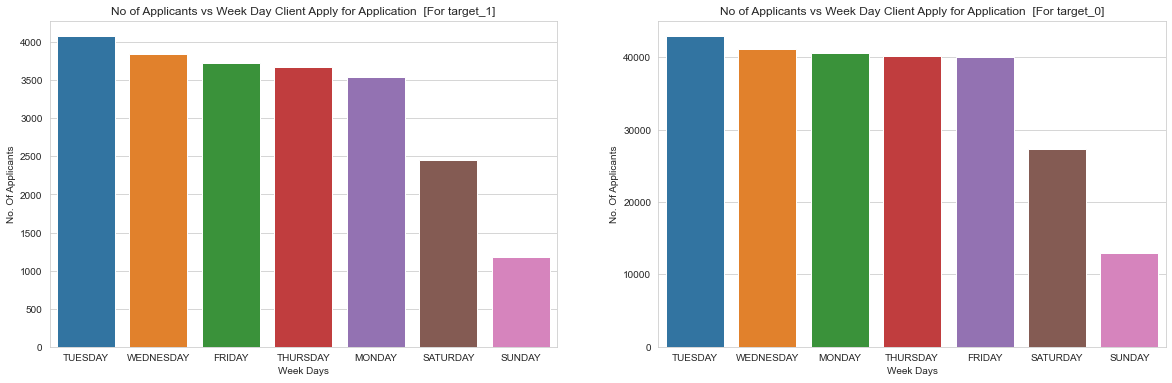

In [247]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)

week_days = target_1.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_1]')

plt.subplot(1,2,2)
week_days = target_0.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_0]')

plt.show()

##### From above graphs we can see that on Tuesday there are highest number of loan applications registered whereas on Sunday least number of application were registered.

### Categorical Unordered Variables

In [288]:
def pie_plot(col_name ):
    plt.figure(figsize=[20,6])

    plt.subplot(1,2,1)
    col_pie = target_1[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For target_1]')

    plt.subplot(1,2,2)
    col_pie = target_0[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For target_0]')
    plt.show()

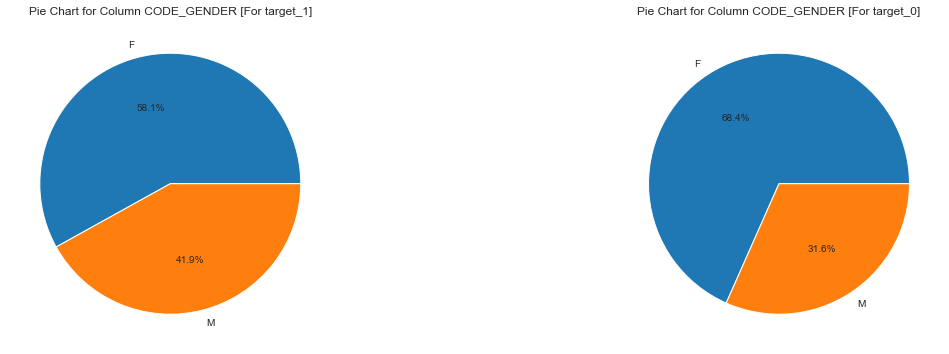

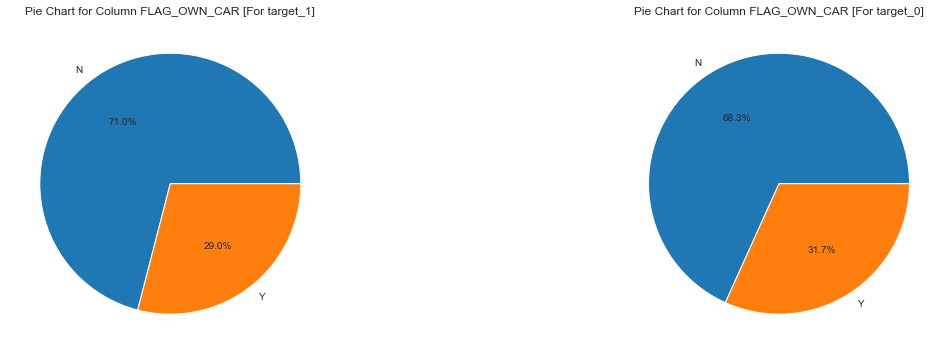

In [289]:
pie_plot('CODE_GENDER')
pie_plot('FLAG_OWN_CAR')

In [302]:
def barp_plot(col_name):
    plt.figure(figsize=[22,10])

    plt.subplot(1,2,1)
    target_1[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_1]')
    plt.xlabel('Number of Loan Applicantions')
    plt.ylabel(col_name)
    plt.subplot(1,2,2)
    target_1[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_0]')
    plt.xlabel('Number of Loan Applicantions')
    plt.ylabel(col_name)
    plt.tight_layout()
    plt.show()

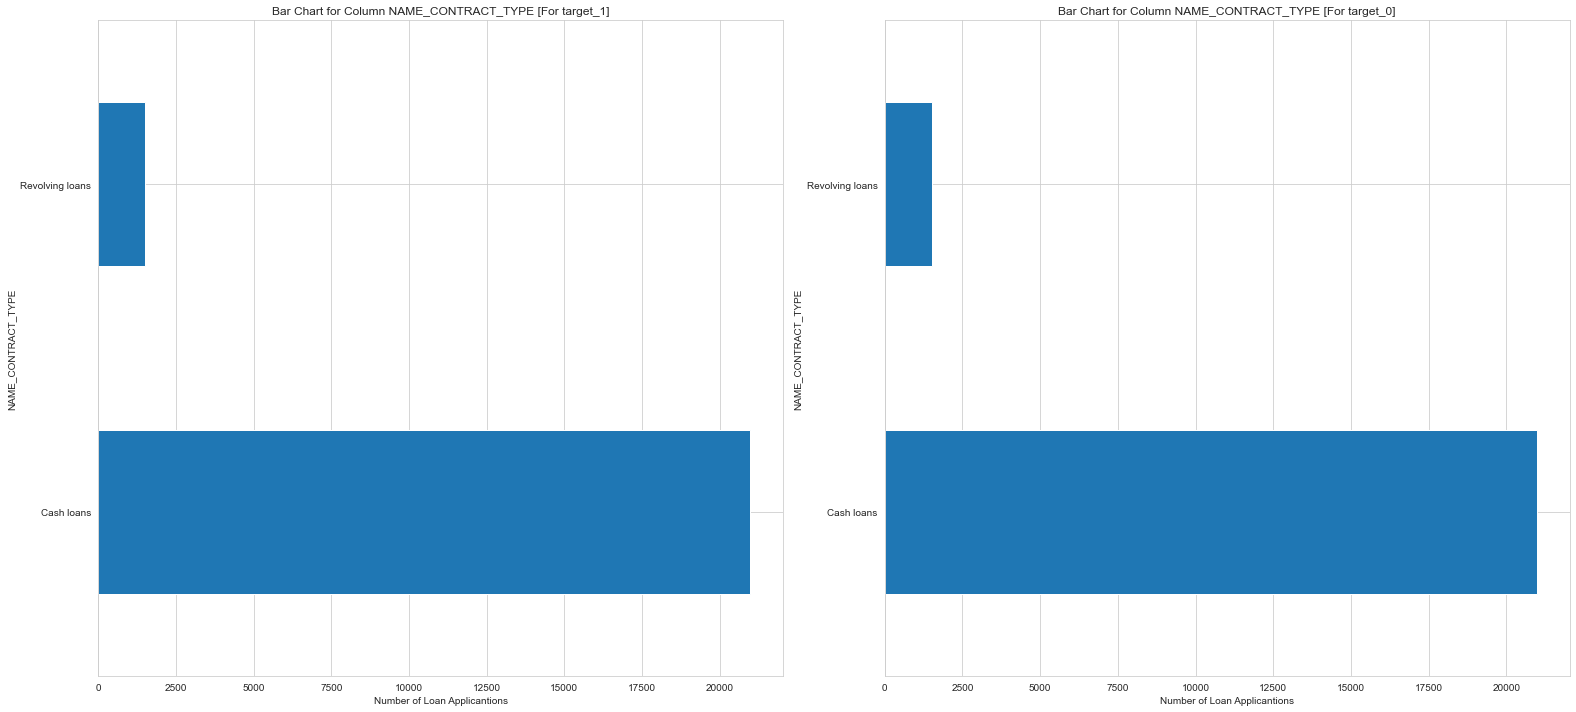

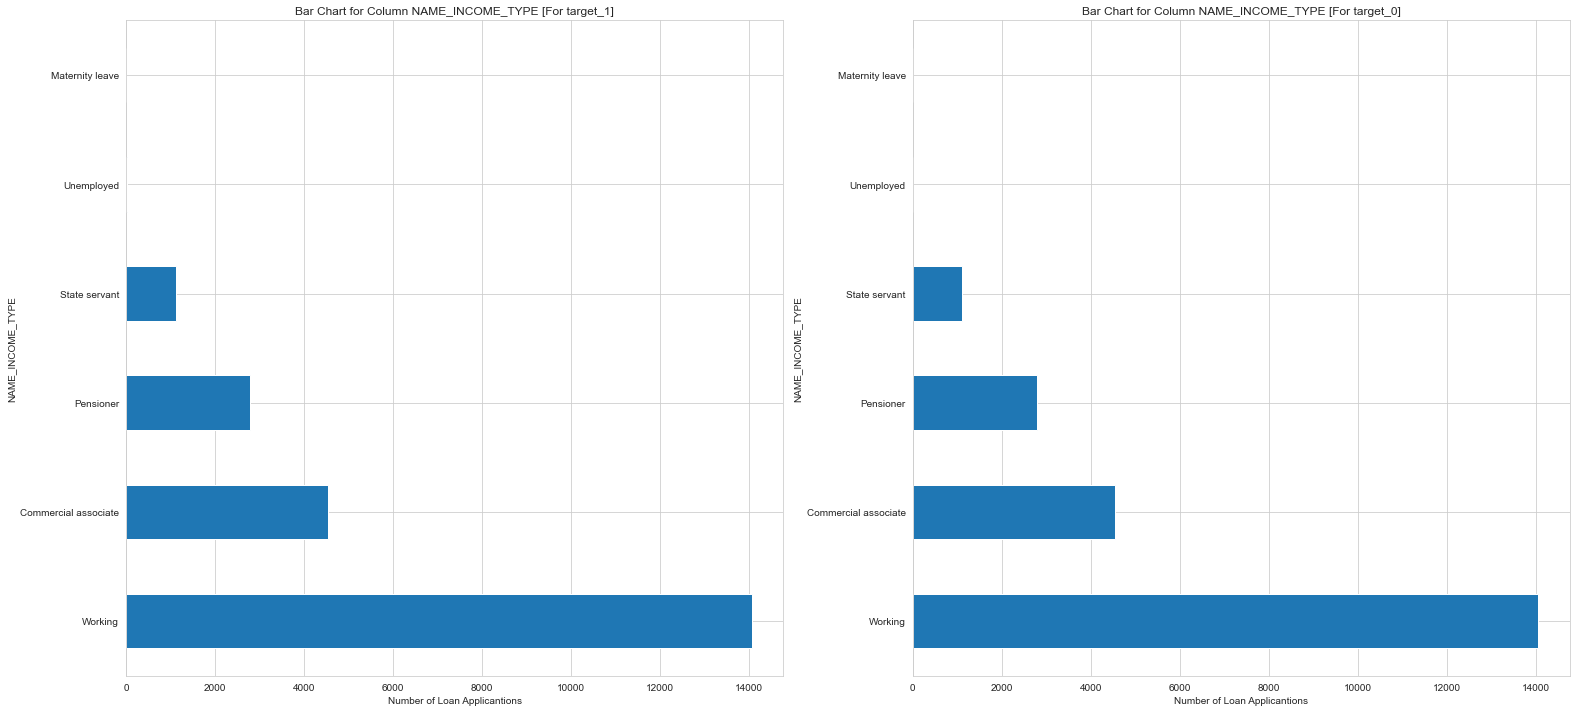

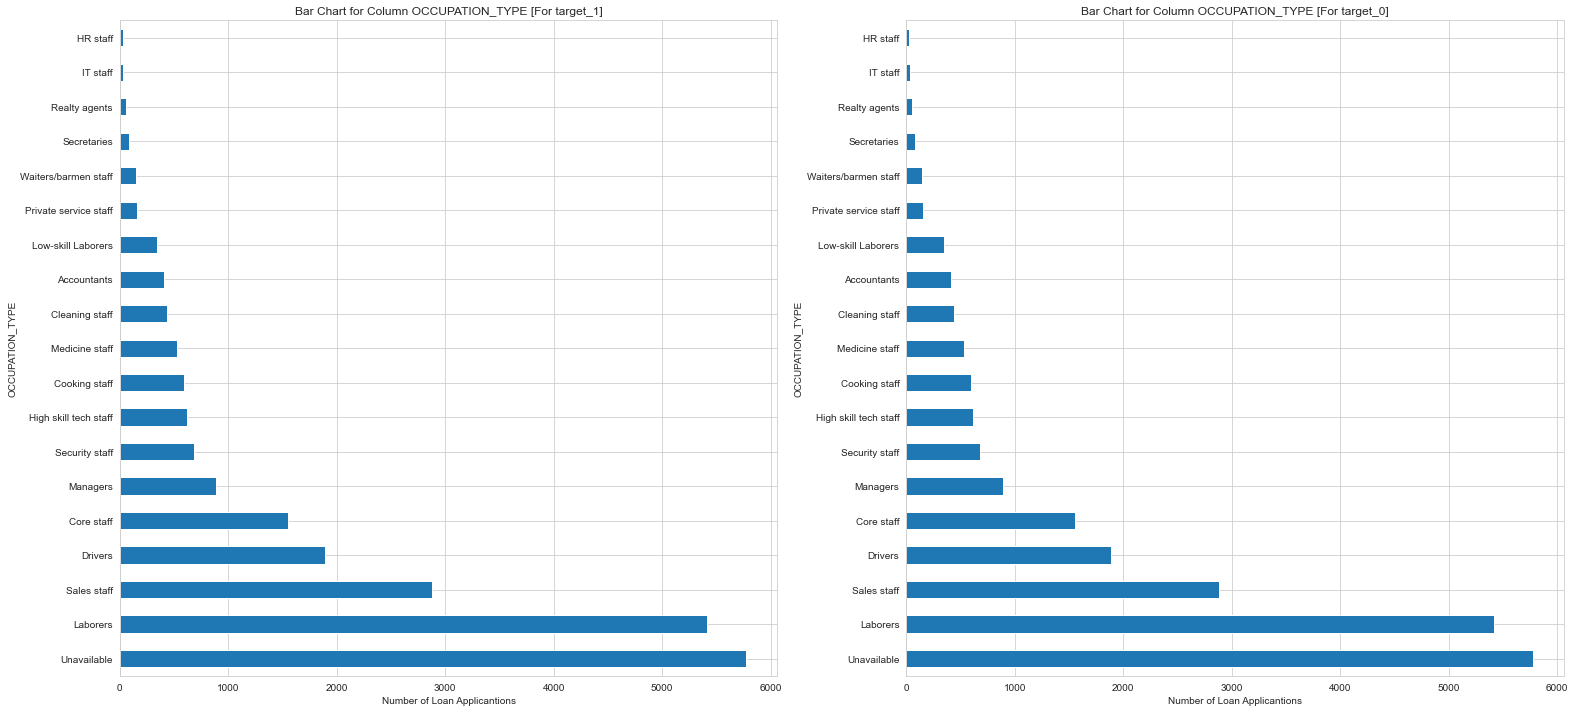

In [304]:
barp_plot('NAME_CONTRACT_TYPE')
barp_plot('NAME_INCOME_TYPE')
barp_plot('OCCUPATION_TYPE')

## Correlation Matrix

In [213]:
corr_mat_Day_1 = target_1[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','Age_Years']].corr()
corr_mat_Day_1

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Age_Years
CNT_CHILDREN,1.000000,-0.030060,-0.010631,0.005361,0.038270,-0.002684,-0.198292,-0.265751
REGION_POPULATION_RELATIVE,-0.030060,1.000000,0.074387,0.044481,0.035665,0.054741,0.017132,0.049330
AMT_INCOME_TOTAL,-0.010631,0.074387,1.000000,0.285123,0.369604,0.285206,-0.132894,-0.025139
AMT_CREDIT,0.005361,0.044481,0.285123,1.000000,0.740562,0.977771,0.000977,0.134933
AMT_ANNUITY,0.038270,0.035665,0.369604,0.740562,1.000000,0.736137,-0.090548,-0.002476
AMT_GOODS_PRICE,-0.002684,0.054741,0.285206,0.977771,0.736137,1.000000,0.006973,0.135989
DAYS_EMPLOYED,-0.198292,0.017132,-0.132894,0.000977,-0.090548,0.006973,1.000000,0.587355
Age_Years,-0.265751,0.049330,-0.025139,0.134933,-0.002476,0.135989,0.587355,1.000000


In [214]:
corr_mat_Day_0= target_0[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','Age_Years']].corr()
corr_mat_Day_0

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Age_Years
CNT_CHILDREN,1.000000,-0.026354,0.028728,0.003528,0.024280,-0.000974,-0.255128,-0.345873
REGION_POPULATION_RELATIVE,-0.026354,1.000000,0.112557,0.036526,0.051709,0.042735,0.003307,0.028639
AMT_INCOME_TOTAL,0.028728,0.112557,1.000000,0.317617,0.395592,0.318994,-0.190596,-0.107670
AMT_CREDIT,0.003528,0.036526,0.317617,1.000000,0.761990,0.982102,-0.065456,0.047231
AMT_ANNUITY,0.024280,0.051709,0.395592,0.761990,1.000000,0.759391,-0.107276,-0.023575
AMT_GOODS_PRICE,-0.000974,0.042735,0.318994,0.982102,0.759391,1.000000,-0.062928,0.045420
DAYS_EMPLOYED,-0.255128,0.003307,-0.190596,-0.065456,-0.107276,-0.062928,1.000000,0.634392
Age_Years,-0.345873,0.028639,-0.107670,0.047231,-0.023575,0.045420,0.634392,1.000000


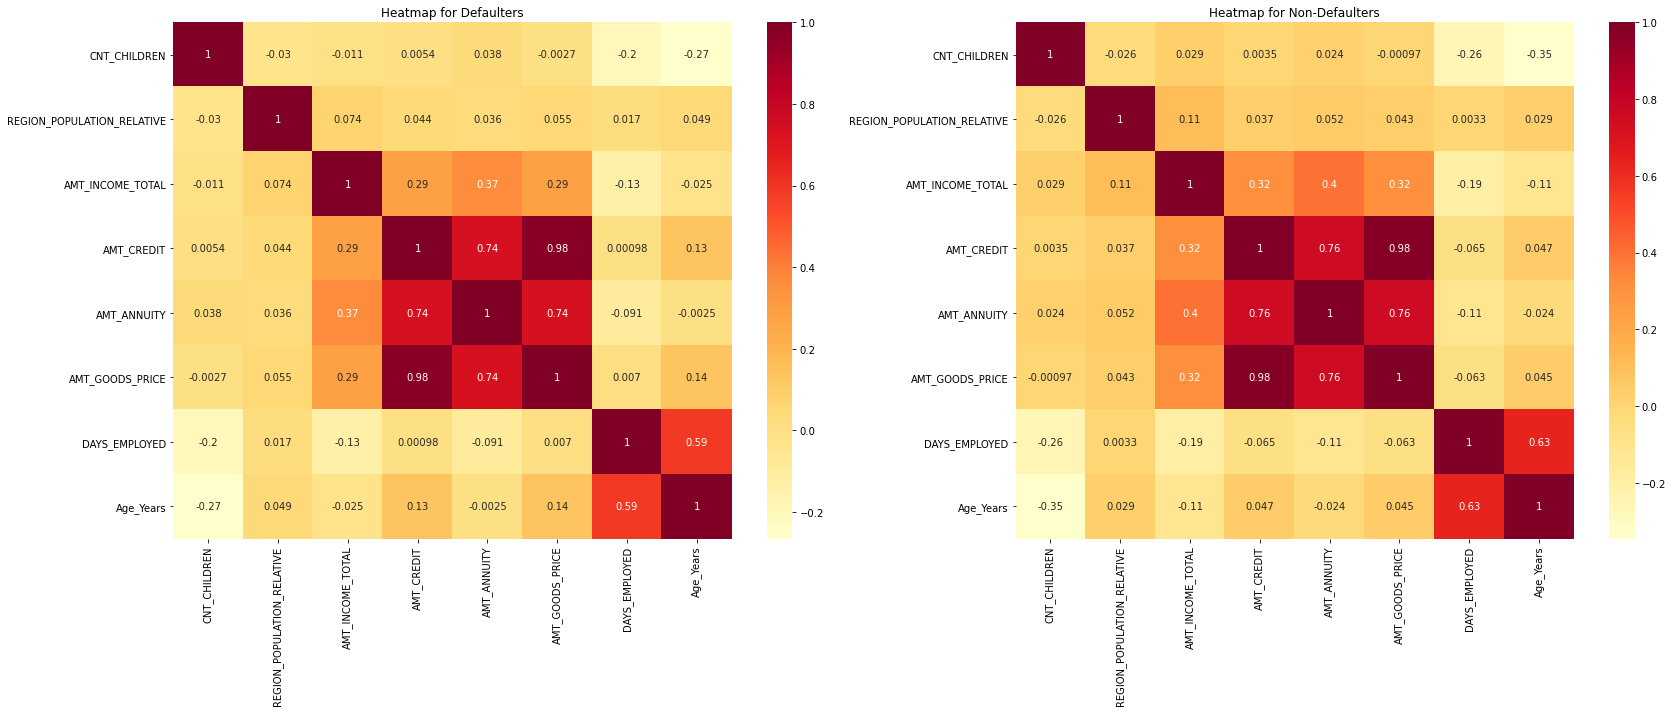

In [215]:
plt.figure(figsize=[24, 10])

plt.subplot(1,2,1)
sns.heatmap(annot= True, data=corr_mat_Day_1, cmap='YlOrRd').set(title='Heatmap for Defaulters')

plt.subplot(1,2,2)
sns.heatmap(annot= True, data=corr_mat_Day_0, cmap='YlOrRd').set(title='Heatmap for Non-Defaulters')
plt.tight_layout()
plt.show()

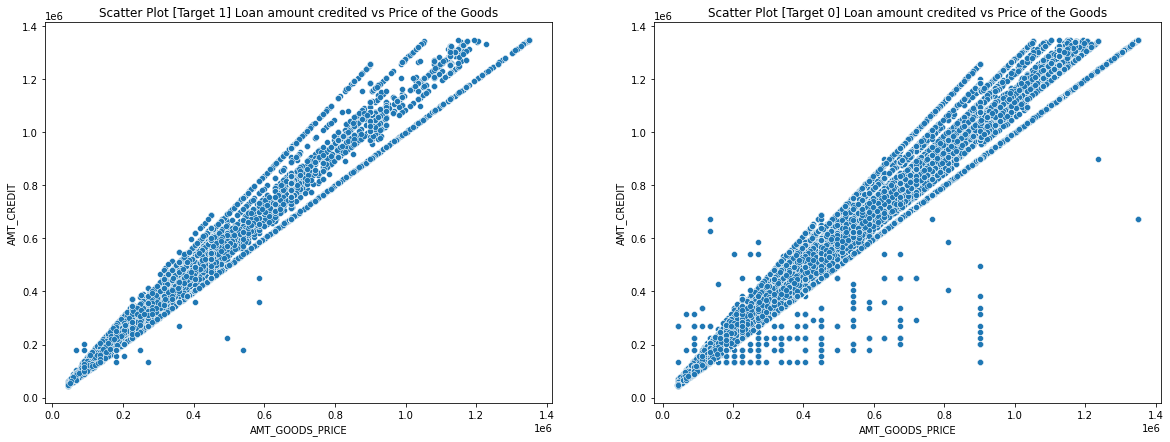

In [216]:
plt.figure(figsize=[20, 7])

plt.subplot(1,2,1)
sns.scatterplot(data=target_1, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 1] Loan amount credited vs Price of the Goods')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 0] Loan amount credited vs Price of the Goods')

plt.show()

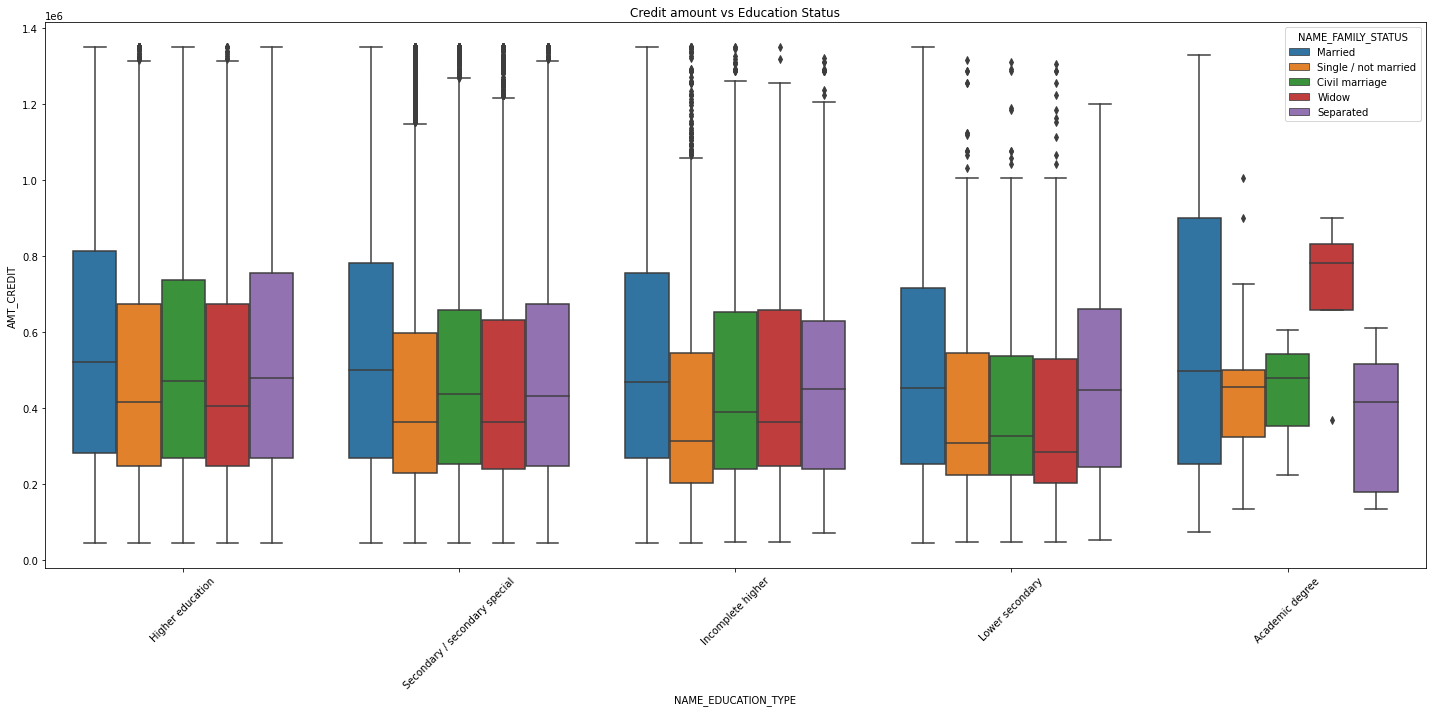

In [217]:
# Box plotting for Credit amount

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.tight_layout()
plt.show()

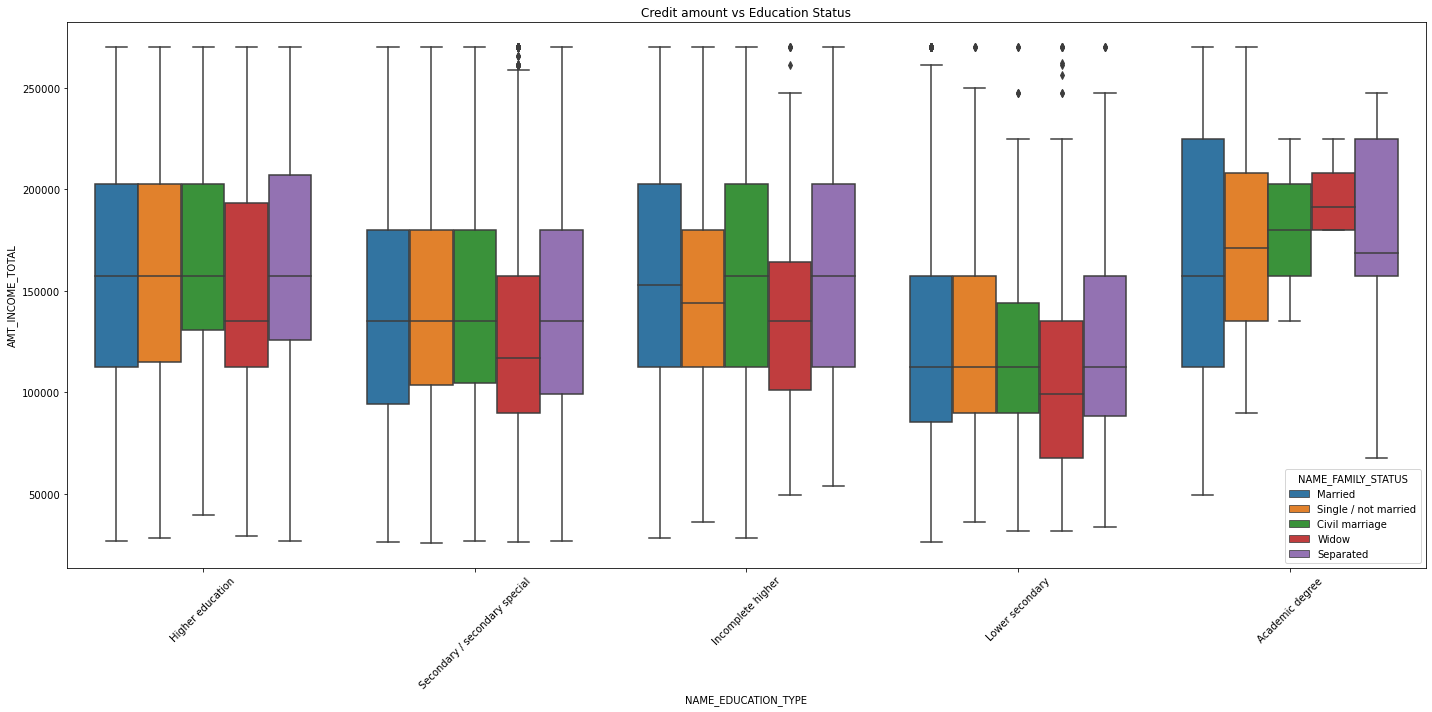

In [218]:
# Box plotting for Credit amount

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.tight_layout()
plt.show()

# Merge with Previous

In [219]:
data_prev_app = pd.read_csv('Data\\previous_application.csv')

In [220]:
data_prv_app_rows, data_prv_app_cols = data_prev_app.shape
print('Shape of Previous Applications Data: Rows',data_prv_app_rows,'Columns:',data_prv_app_cols)

Shape of Previous Applications Data: Rows 1670214 Columns: 37


In [221]:
#List of columns with missing values percentage greater than 40
prv_app_data_mis_vals = round(data_prev_app.isnull().sum()/data_prv_app_rows*100,2)
drop_cols_prv = prv_app_data_mis_vals[prv_app_data_mis_vals>30].index.tolist()

print('Number of Columns that have missing values percentage greater than 30%:', len(drop_cols_prv))

Number of Columns that have missing values percentage greater than 30%: 11


In [222]:
#Dropping the columns which have more than 40% missing values
data_prev_app.drop(labels=drop_cols_prv,axis=1,inplace=True)

In [223]:
# Now merging the Application dataset with previous appliaction dataset
final_df=pd.merge(left=data_app,right=data_prev_app,how='inner',on='SK_ID_CURR')

mis_col_cnt = final_df.isna().sum().to_frame(name='Total')
mis_col_cnt[mis_col_cnt.Total>0].count()

In [224]:
final_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

In [225]:
final_df.rename({'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_APP','AMT_CREDIT_x':'AMT_CREDIT_APP', 
'AMT_ANNUITY_x':'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_APP',
'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START_APP', 'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START_APP',
'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PRV', 'AMT_ANNUITY_y':'AMT_ANNUITY_PRV',
'AMT_CREDIT_y':'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PRV',
'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PRV', 'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PRV'}, axis=1, inplace=True)

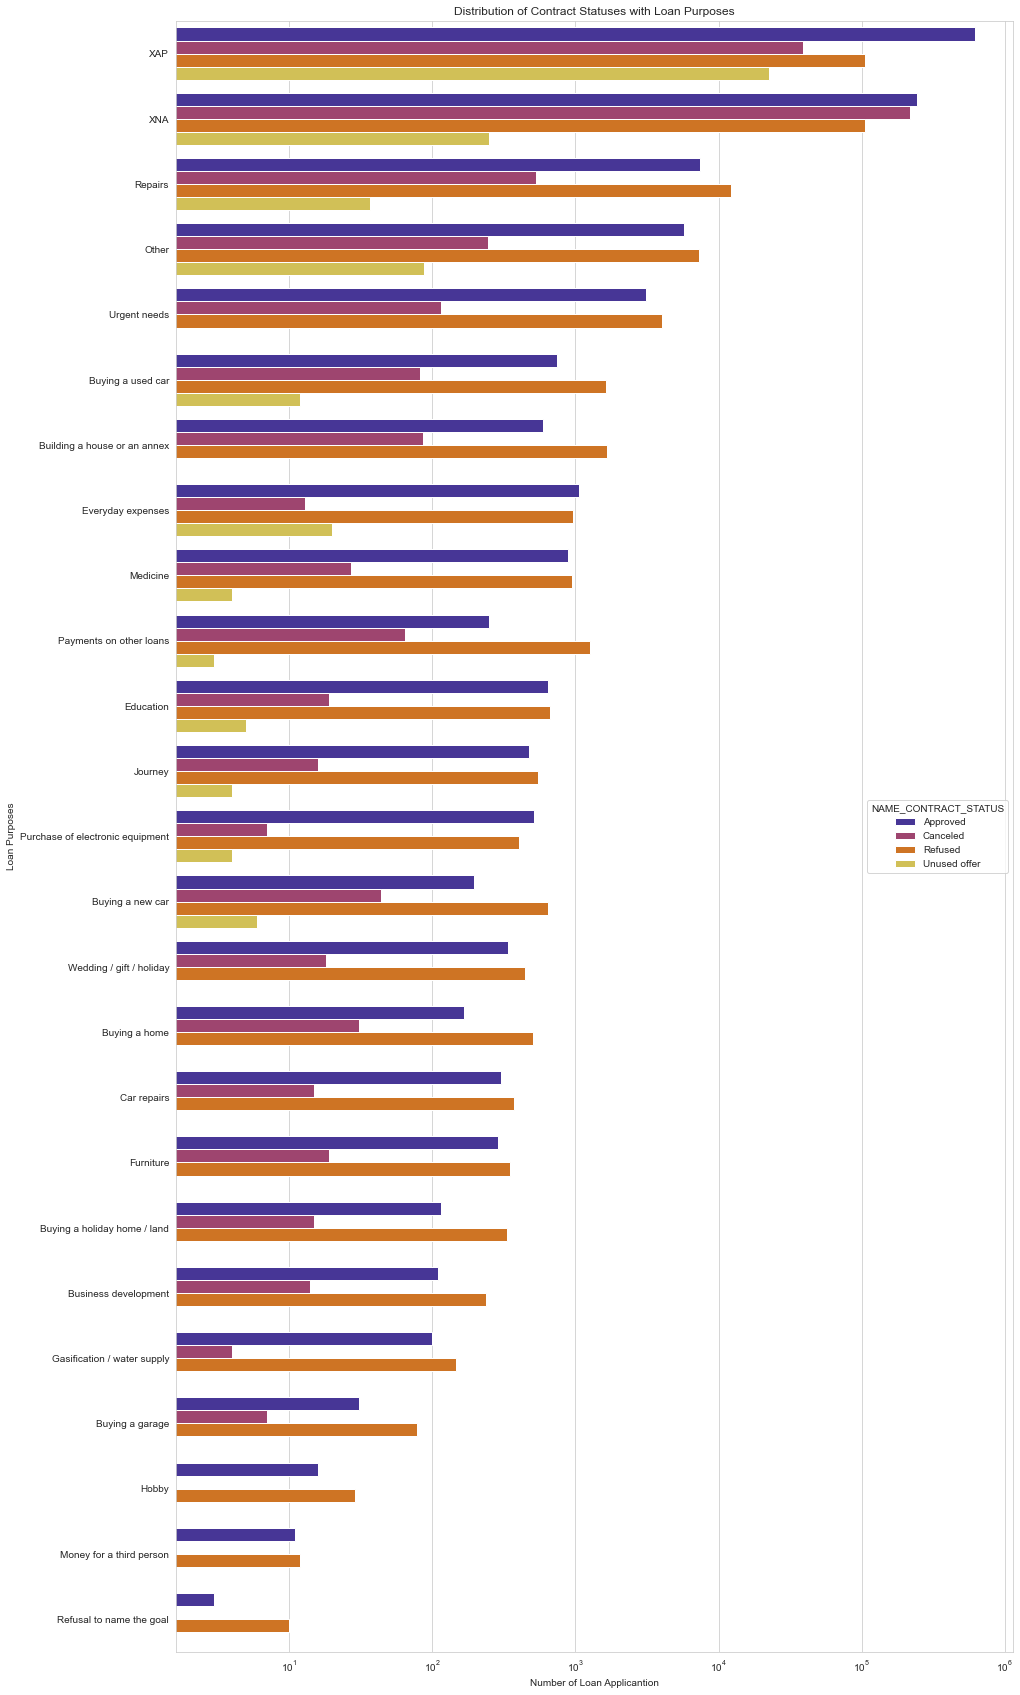

In [226]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Contract Statuses with Loan Purposes')
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='CMRmap').set(xlabel='Number of Loan Applicantion',ylabel='Loan Purposes')

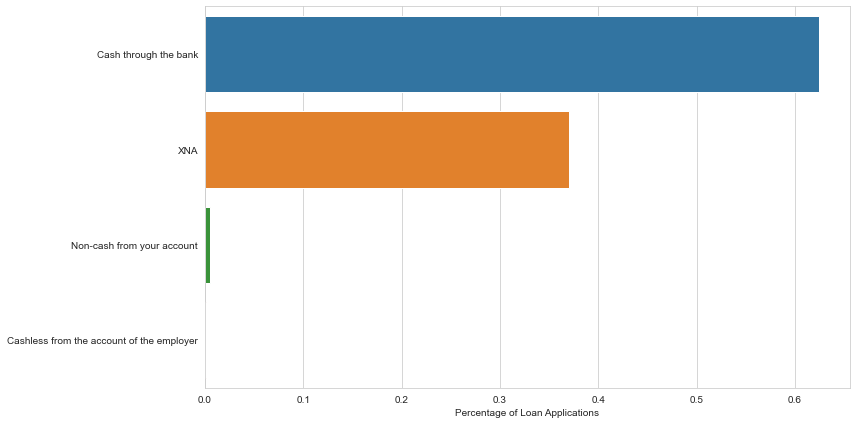

In [227]:
plt.figure(figsize=[12,6])
Payment_Type = final_df.NAME_PAYMENT_TYPE.value_counts(normalize=True).to_frame(name='Percentage of Loan Applications')
sns.barplot(data=Payment_Type, y=Payment_Type.index, x=Payment_Type['Percentage of Loan Applications'],orient='h')
plt.tight_layout()
plt.show()

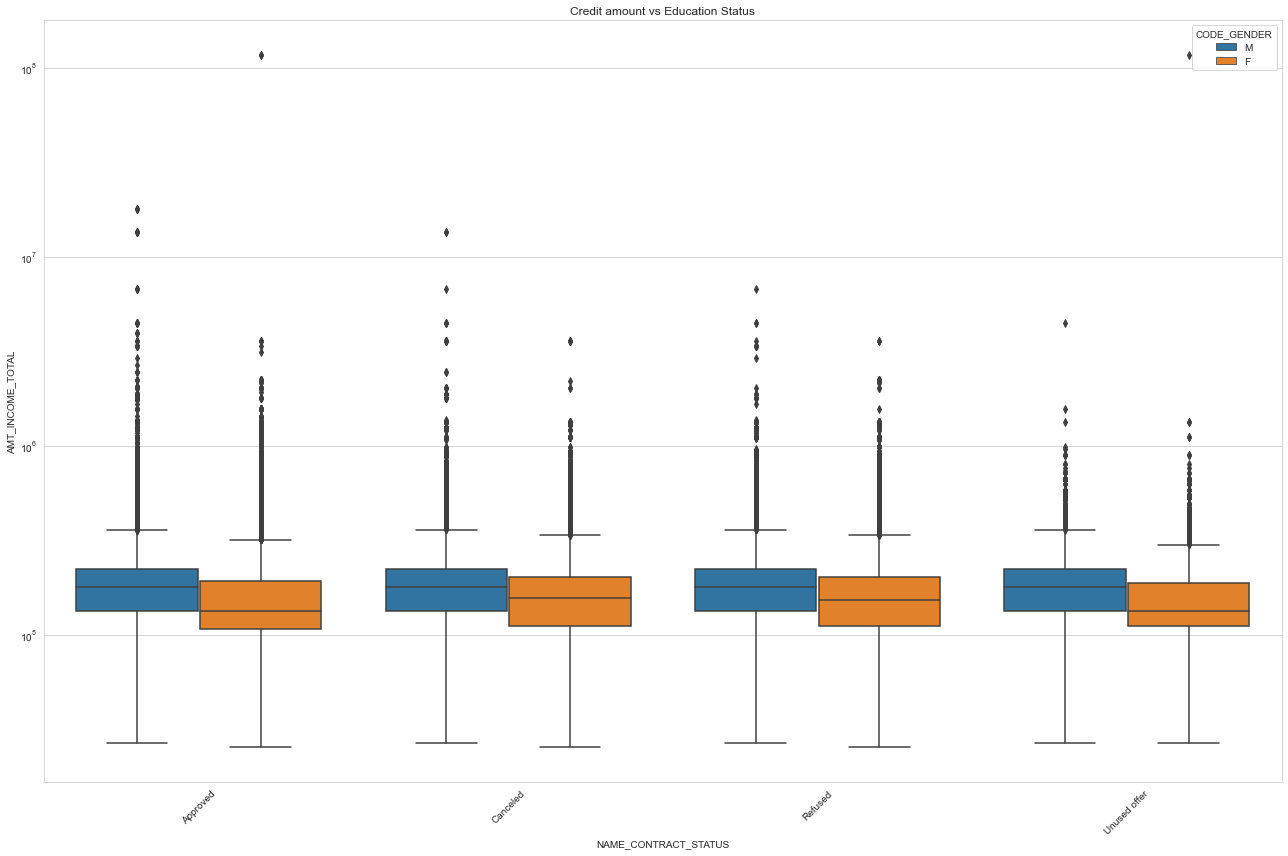

In [228]:
# Box plotting for Credit amount

plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =final_df, y='AMT_INCOME_TOTAL',x='NAME_CONTRACT_STATUS', hue ='CODE_GENDER',orient='v')
plt.title('Credit amount vs Education Status')
plt.tight_layout()
plt.show()

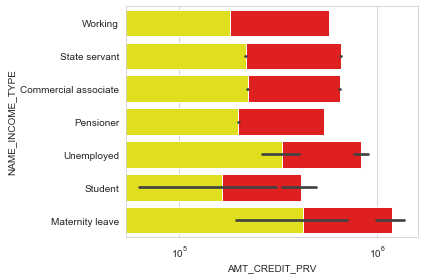

In [229]:
plt.xscale('log')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_APP,color='Red')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_PRV,color='Yellow')
plt.tight_layout()

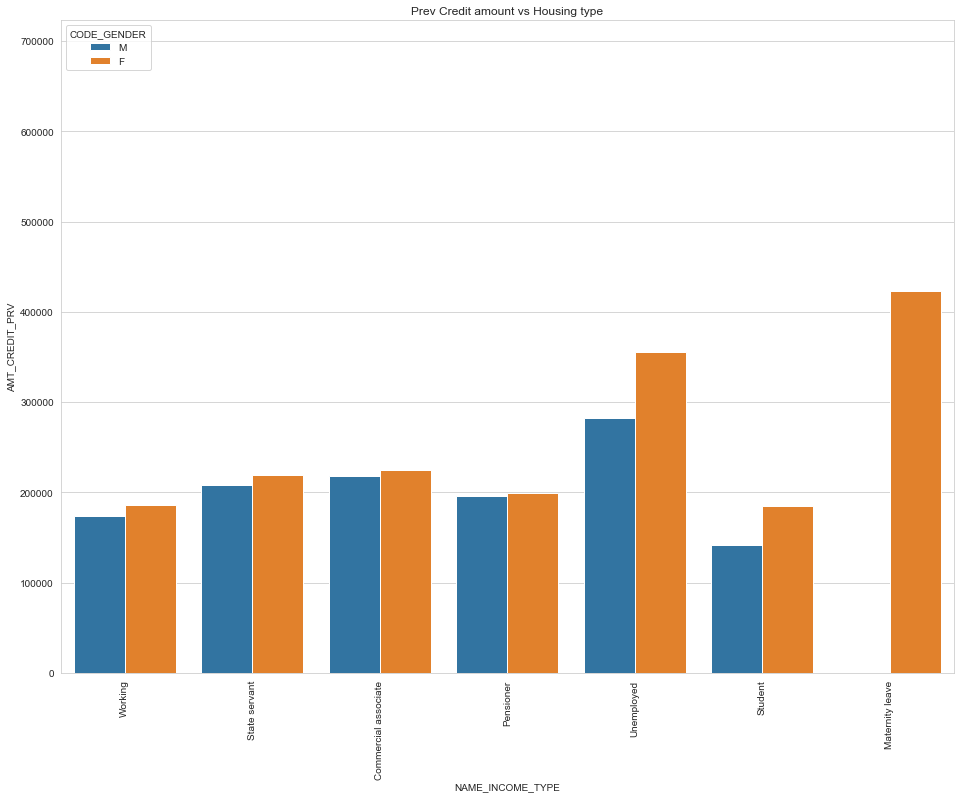

In [230]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =final_df, y='AMT_CREDIT_PRV',hue='CODE_GENDER',x='NAME_INCOME_TYPE',errwidth=0)
plt.title('Prev Credit amount vs Housing type')
plt.show()

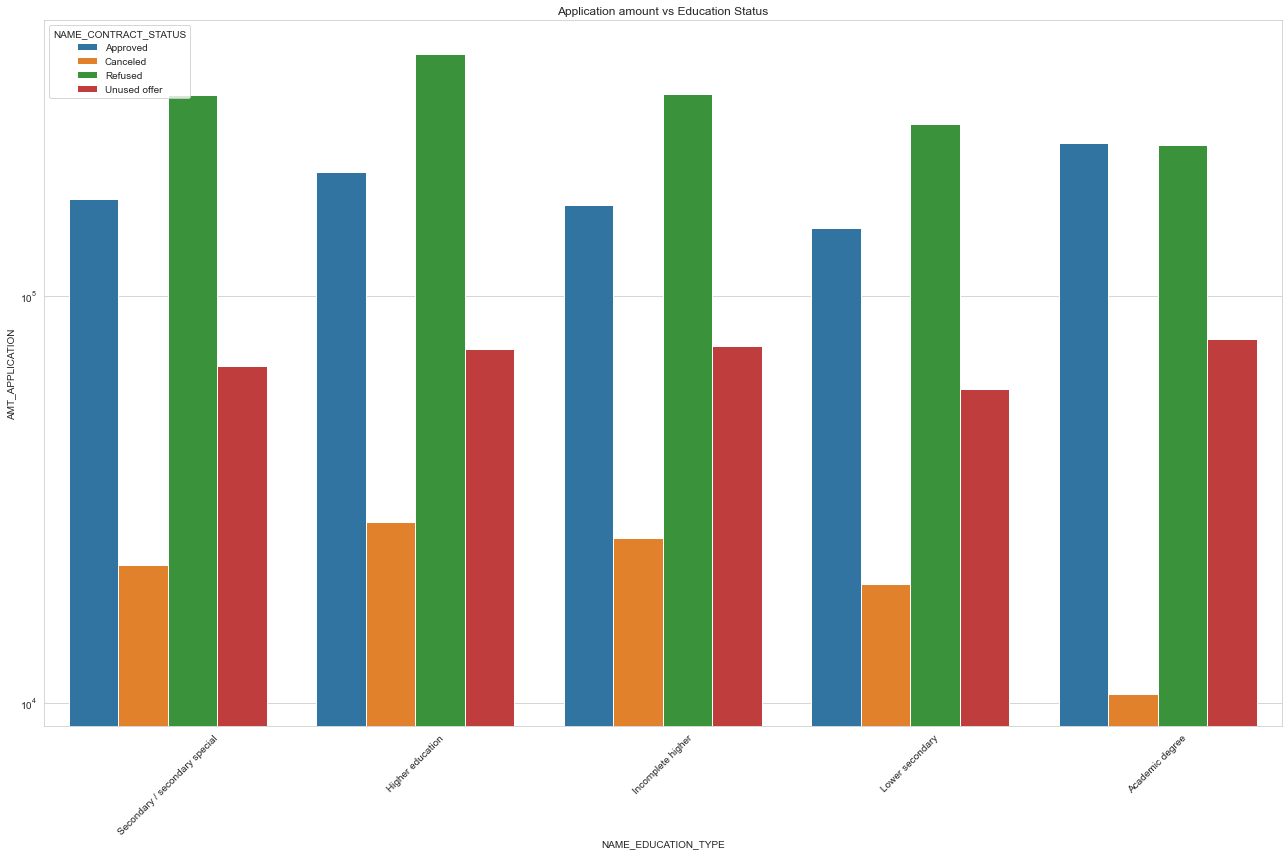

In [231]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =final_df, y='AMT_APPLICATION',x='NAME_EDUCATION_TYPE', hue ='NAME_CONTRACT_STATUS',orient='v', errwidth=0)
plt.title('Application amount vs Education Status')
plt.tight_layout()
plt.show()

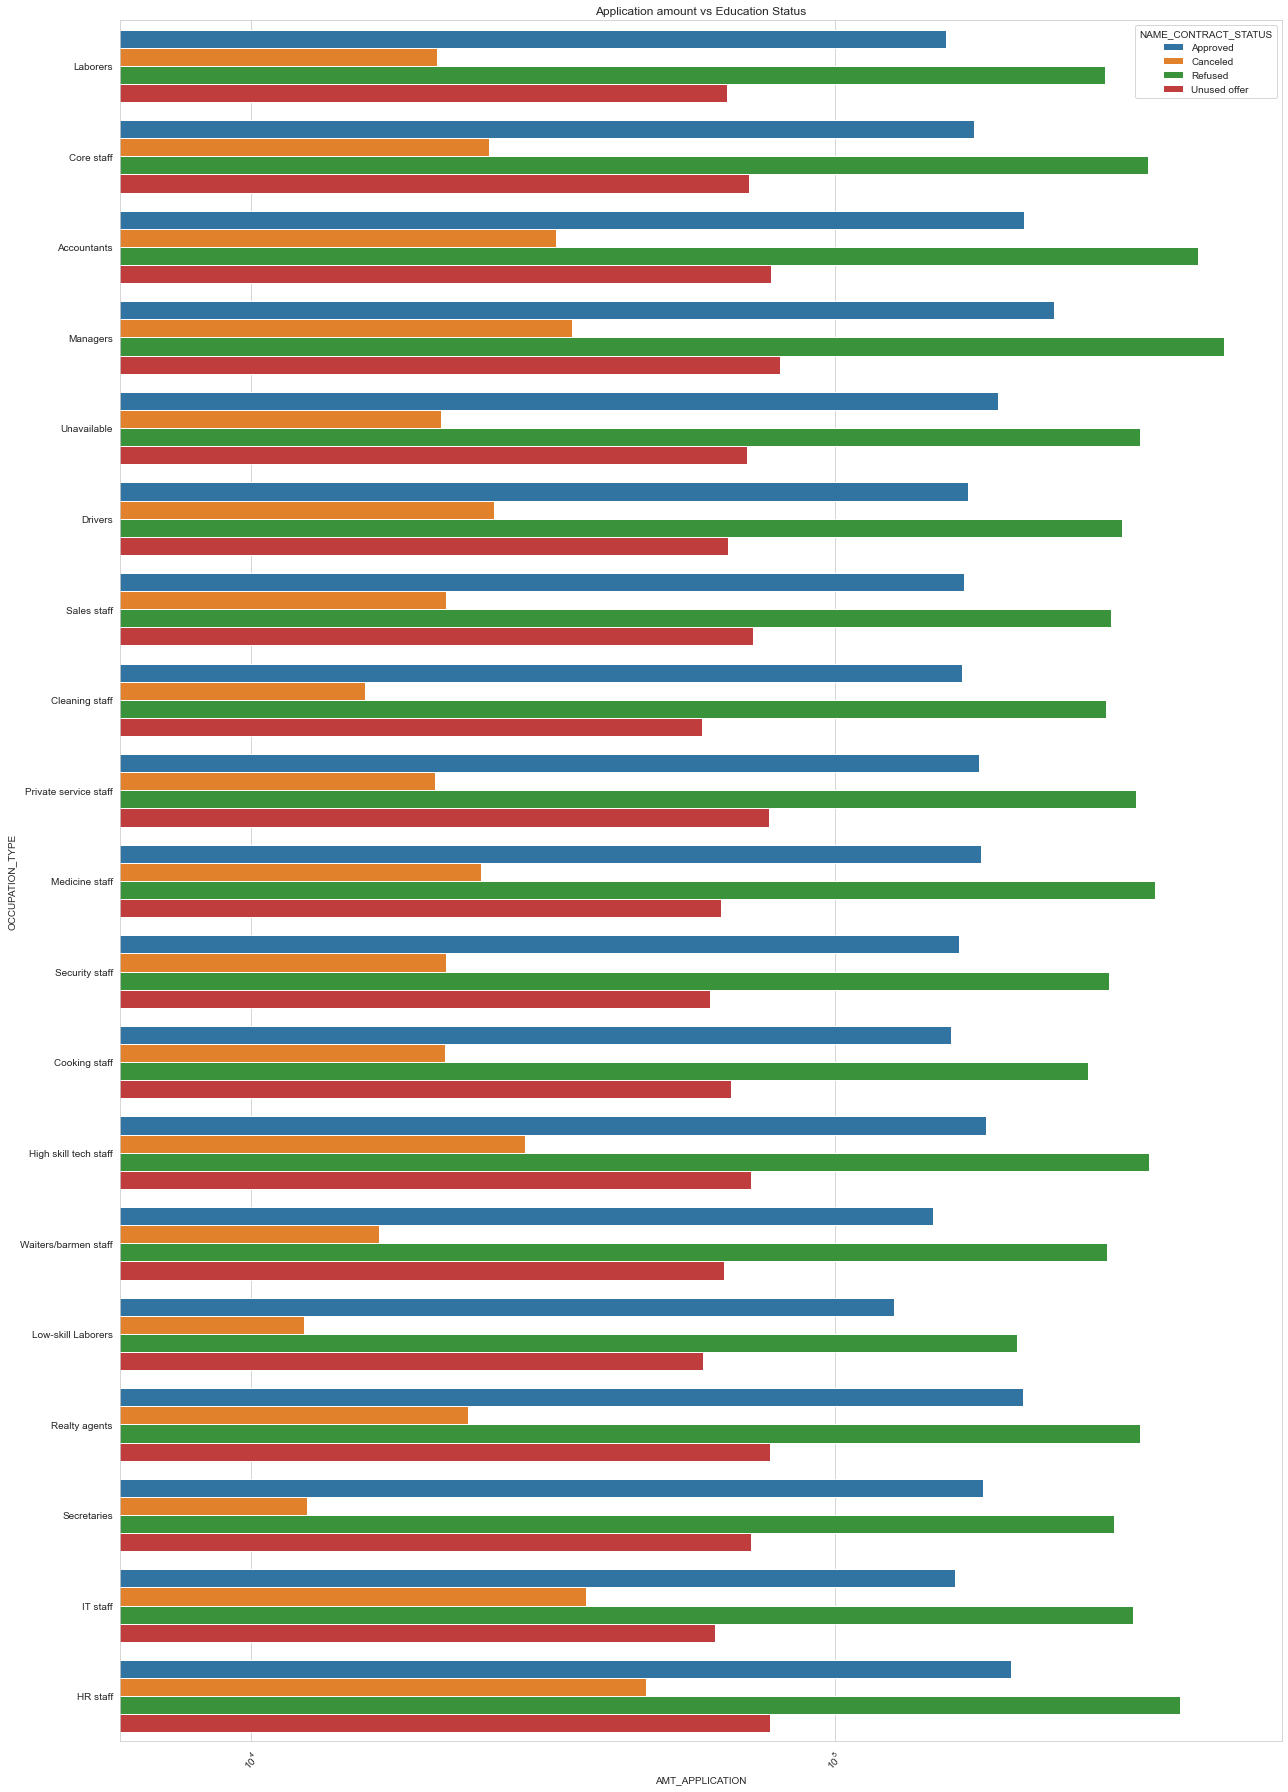

In [232]:
plt.figure(figsize=(18,25))
plt.xticks(rotation=45)
plt.xscale('log')
sns.barplot(data =final_df, x='AMT_APPLICATION',y='OCCUPATION_TYPE', hue ='NAME_CONTRACT_STATUS',orient='h', errwidth=0)
plt.title('Application amount vs Education Status')
plt.tight_layout()
plt.show()

In [233]:
corr_mat_final = final_df[['AMT_INCOME_TOTAL',
       'AMT_CREDIT_APP', 'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_APP','CNT_CHILDREN','CNT_FAM_MEMBERS','Age_Years','AMT_APPLICATION','AMT_ANNUITY_PRV',
        'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_PRV']].corr()
corr_mat_final

,AMT_INCOME_TOTAL,AMT_CREDIT_APP,AMT_ANNUITY_APP,AMT_GOODS_PRICE_APP,CNT_CHILDREN,Age_Years,AMT_APPLICATION,AMT_ANNUITY_PRV,AMT_CREDIT_PRV,AMT_GOODS_PRICE_PRV
AMT_INCOME_TOTAL,1.000000,0.166258,0.206290,0.167658,0.011668,-0.025668,0.071492,0.121576,0.070652,0.081967
AMT_CREDIT_APP,0.166258,1.000000,0.758438,0.986321,0.002809,0.047665,0.118813,0.152961,0.116750,0.137749
AMT_ANNUITY_APP,0.206290,0.758438,1.000000,0.762255,0.029334,-0.029013,0.112067,0.202537,0.107650,0.134162
AMT_GOODS_PRICE_APP,0.167658,0.986321,0.762255,1.000000,-0.000990,0.045940,0.120740,0.155060,0.117231,0.138945
CNT_CHILDREN,0.011668,0.002809,0.029334,-0.000990,1.000000,-0.362970,-0.034170,-0.039863,-0.034864,-0.051214
Age_Years,-0.025668,0.047665,-0.029013,0.045940,-0.362970,1.000000,0.079796,0.085755,0.078089,0.111681
AMT_APPLICATION,0.071492,0.118813,0.112067,0.120740,-0.034170,0.079796,1.000000,0.809973,0.975683,0.999871
AMT_ANNUITY_PRV,0.121576,0.152961,0.202537,0.155060,-0.039863,0.085755,0.809973,1.000000,0.817977,0.822205
AMT_CREDIT_PRV,0.070652,0.116750,0.107650,0.117231,-0.034864,0.078089,0.975683,0.817977,1.000000,0.993201
AMT_GOODS_PRICE_PRV,0.081967,0.137749,0.134162,0.138945,-0.051214,0.111681,0.999871,0.822205,0.993201,1.000000


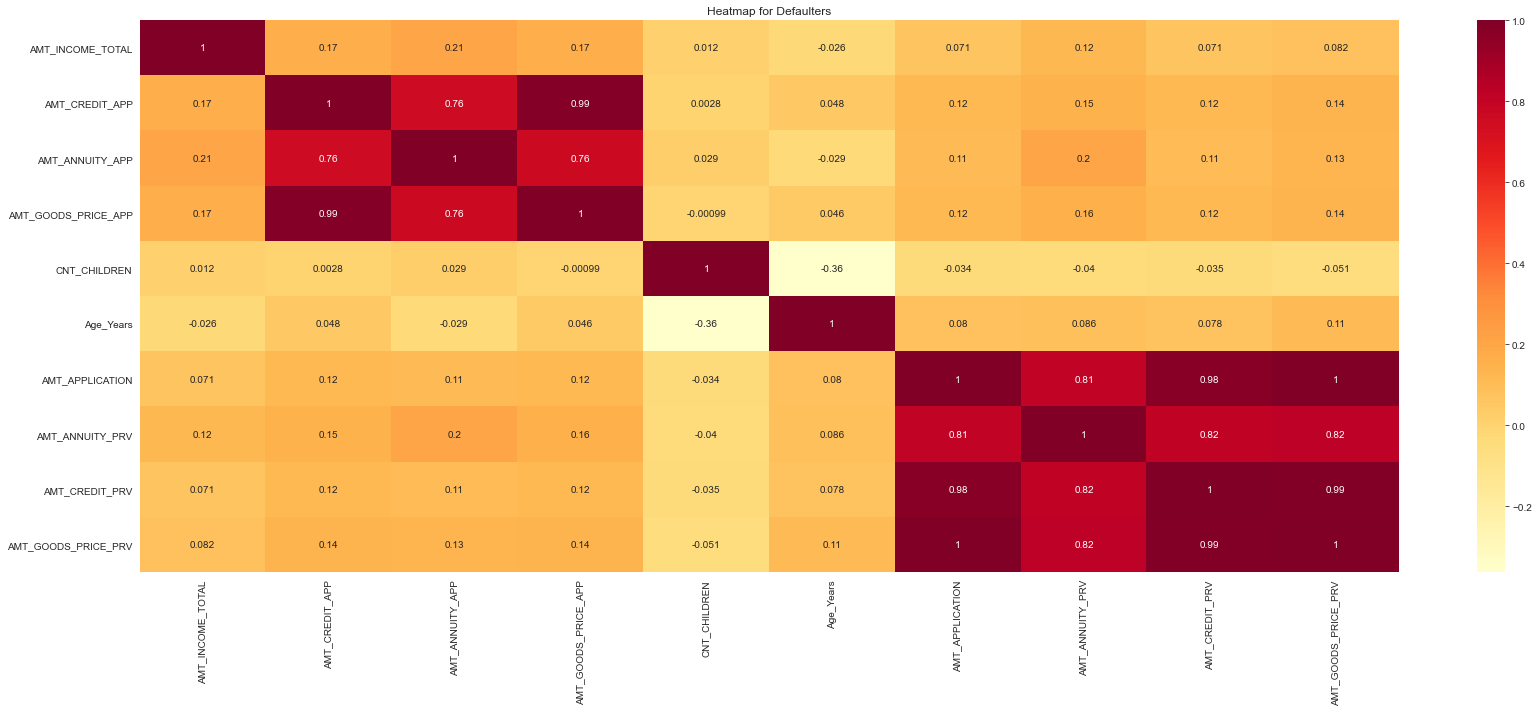

In [234]:
plt.figure(figsize=[24, 10])

sns.heatmap(annot= True, data=corr_mat_final, cmap='YlOrRd').set(title='Heatmap for Defaulters')
plt.tight_layout()
plt.show()